# BASE vs SHIFT by-layer differences

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import arrow
import glob
import sys
sys.path.append('./bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
import extract_bylayer_mean as ebm
from importlib import reload
from salishsea_tools import viz_tools

%matplotlib inline
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 13,
                     'xtick.labelsize' : 13,
                     'ytick.labelsize' : 13})

In [5]:
reload(ebmBOX)
reload(ebm)

<module 'extract_bylayer_mean' from './bylayer_extract/extract_bylayer_mean.py'>

### [A] Map definition and station definition

In [6]:


# w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
# pco2 = w['model_output']['pCO2'][:]
# pco2[pco2>2e5] = np.nan
# pco2[pco2<2000] = 500
# fact = 1.5
# fig = plt.figure(figsize=(12*fact,6.5*fact))

# ax0 = fig.add_subplot(1,2,1)
# #toba and bute

# im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
# viz_tools.set_aspect(ax0)
# #jdf
# rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
# ax0.add_patch(rect_jdf)
# rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
# ax0.add_patch(rect_jdf)
# rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
# ax0.add_patch(rect_jdf)

# rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
# ax0.add_patch(rect_haro)
# rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
# ax0.add_patch(rect_haro)
# rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
# ax0.add_patch(rect_haro)

# rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
# ax0.add_patch(rect_cs)
# rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
# ax0.add_patch(rect_cs)
# rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
# ax0.add_patch(rect_cs)

# rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
# ax0.add_patch(rect_ns)
# rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
# ax0.add_patch(rect_ns)
# rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
# ax0.add_patch(rect_ns)

# ax0.set_title('individual stations')




reload(ebmBOX)

    # reload(ebmBOX)

    # #(start, end, ftype, sdir, varname, fname, y, x)
    # pkldir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
    # start = '2015-01-01' #start of timeperiod
    # end = '2015-12-31' #end of timeperiod (typically a year)
    # ftype = 'carp' #type of model result .nc 
    # sdir = 'MAIN/BR_3rd_2015' #where under directory tree do we find ncs 
    # varname = 'dissolved_inorganic_carbon' #name of variable
    # fname = pkldir + 'BR3_DIC_means_cs2_BOX'
    # y = cs2_y; x = cs2_x
    # ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

run for PI4, BR3 for the above 12 stations, usage case above


## extractions in ebmBOX_and_ebm_BASE.ipynb and ebmBOX_and_ebm_SHIFT.ipynb

#### LOAD PKLS OF ABOVE EXTRACTED QUANTITIES

In [7]:
#extract means for BR1-BR3, get fraser discharge
#var

BASE_var = pickle.load(open('./pkls/BASE_DIC_means_inletsIN.pkl' , 'rb')) 
SHIFT_var = pickle.load(open('./pkls/SHIFT_DIC_means_inletsIN.pkl' , 'rb')) 

BASE_var[BASE_var == 0] = np.nan
SHIFT_var[SHIFT_var == 0] = np.nan

#Fraser_discharge = pickle.load(open('../pkls/Fraser_2015_year_runoff_m3_s.pkl', 'rb'))  



mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]
days_in = np.arange(1,366,1)
#make a long 3-year dataset to be able to compare spinup progress for BR run


#### load all DIC data for SHIFT and BASE 

In [8]:
BASE_var_jdf = pickle.load(open('./pkls/BASE_DIC_means_jdf_BOX.pkl','rb'))
SHIFT_var_jdf = pickle.load(open('./pkls/SHIFT_DIC_means_jdf_BOX.pkl','rb'))
BASE_var_cs = pickle.load(open('./pkls/BASE_DIC_means_cs_BOX.pkl','rb'))
SHIFT_var_cs = pickle.load(open('./pkls/SHIFT_DIC_means_cs_BOX.pkl','rb'))
BASE_var_ns = pickle.load(open('./pkls/BASE_DIC_means_ns_BOX.pkl','rb'))
SHIFT_var_ns = pickle.load(open('./pkls/SHIFT_DIC_means_ns_BOX.pkl','rb'))
BASE_var_haro = pickle.load(open('./pkls/BASE_DIC_means_haro_BOX.pkl','rb'))
SHIFT_var_haro = pickle.load(open('./pkls/SHIFT_DIC_means_haro_BOX.pkl','rb'))

BASE_var_jdf2 = pickle.load(open('./pkls/BASE_DIC_means_jdf2_BOX.pkl','rb'))
SHIFT_var_jdf2 = pickle.load(open('./pkls/SHIFT_DIC_means_jdf2_BOX.pkl','rb'))
BASE_var_cs2 = pickle.load(open('./pkls/BASE_DIC_means_cs2_BOX.pkl','rb'))
SHIFT_var_cs2 = pickle.load(open('./pkls/SHIFT_DIC_means_cs2_BOX.pkl','rb'))
BASE_var_ns2 = pickle.load(open('./pkls/BASE_DIC_means_ns2_BOX.pkl','rb'))
SHIFT_var_ns2 = pickle.load(open('./pkls/SHIFT_DIC_means_ns2_BOX.pkl','rb'))
BASE_var_haro2 = pickle.load(open('./pkls/BASE_DIC_means_haro2_BOX.pkl','rb'))
SHIFT_var_haro2 = pickle.load(open('./pkls/SHIFT_DIC_means_haro2_BOX.pkl','rb'))

BASE_var_jdf3 = pickle.load(open('./pkls/BASE_DIC_means_jdf3_BOX.pkl','rb'))
SHIFT_var_jdf3 = pickle.load(open('./pkls/SHIFT_DIC_means_jdf3_BOX.pkl','rb'))
BASE_var_cs3 = pickle.load(open('./pkls/BASE_DIC_means_cs3_BOX.pkl','rb'))
SHIFT_var_cs3 = pickle.load(open('./pkls/SHIFT_DIC_means_cs3_BOX.pkl','rb'))
BASE_var_ns3 = pickle.load(open('./pkls/BASE_DIC_means_ns3_BOX.pkl','rb'))
SHIFT_var_ns3 = pickle.load(open('./pkls/SHIFT_DIC_means_ns3_BOX.pkl','rb'))
BASE_var_haro3 = pickle.load(open('./pkls/BASE_DIC_means_haro3_BOX.pkl','rb'))
SHIFT_var_haro3 = pickle.load(open('./pkls/SHIFT_DIC_means_haro3_BOX.pkl','rb'))


### [B] nice plot - PI5

Text(0.5, 1.0, 'individual stations')

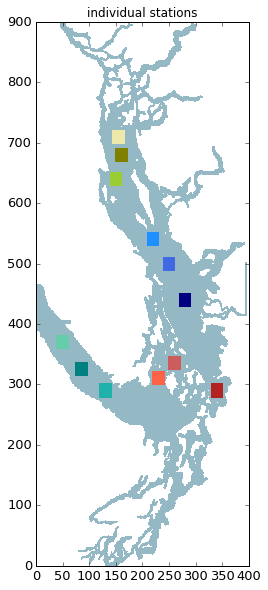

In [9]:
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax0.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax0.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax0.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax0.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax0.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax0.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax0.add_patch(rect_ns)

ax0.set_title('individual stations')



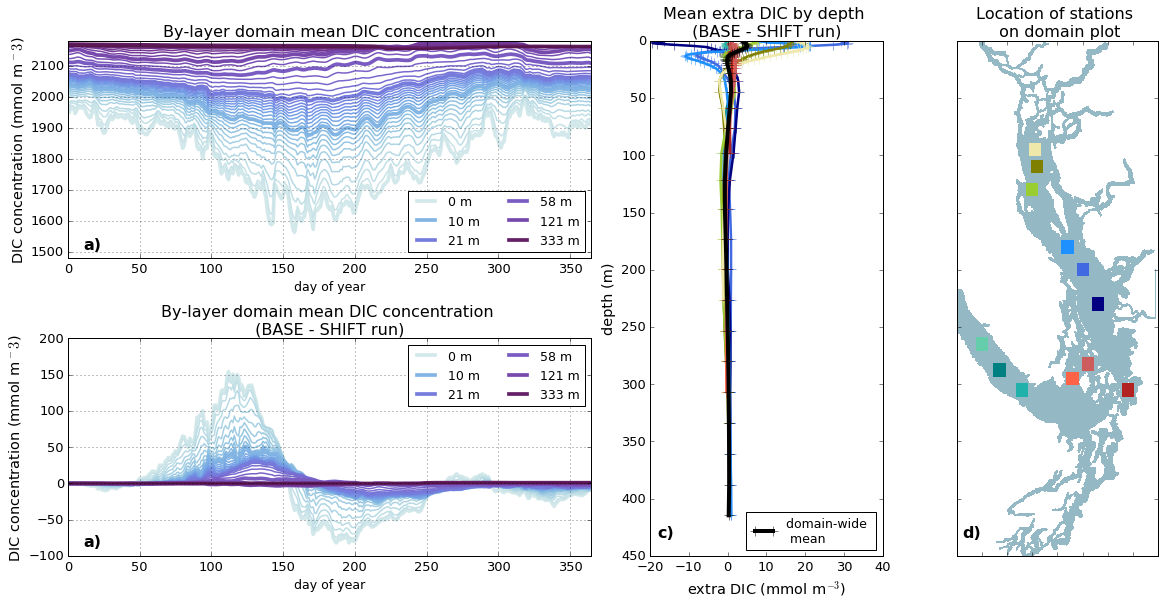

In [10]:
ts = 16 # title font
fs = 14.5 # all other font sizes
fact = 1
lw = 1.5
fig = plt.figure(figsize=(16.5*fact, 8.5*fact))
seg = 45
shift = 2
depth = mesh['e3t_0'][0,:,250,250]
ax1 = plt.subplot2grid((2,4), (0,0), colspan=2, rowspan=1)
tcm = cm.dense

depths = mesh['gdept_1d'][:]
zdepths = depths[0]
for i in range(0,40):
#     zdepth = np.sum(depth[0:i])
    zdepth = zdepths[i]
    #print('i is '+ str(i) + ', depth is '+str(zdepth))

    ax1.plot(days_in,BASE_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
        | (i == 27) | (i == 35 ) ) :
        ax1.plot(days_in,BASE_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = str(int(zdepth))+' m', linewidth = lw+2.2)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'lower right', fontsize = fs-2, ncol = 2)
plt.xlim([0,365*1])
plt.ylim([1480,2180])
plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration', fontsize = ts)


ax1 = plt.subplot2grid((2,4), (1,0), colspan=2, rowspan=1)
tcm = cm.dense

depths = mesh['gdept_1d'][:]
zdepths = depths[0]
for i in range(0,40):
#     zdepth = np.sum(depth[0:i])
    zdepth = zdepths[i]
    #print('i is '+ str(i) + ', depth is '+str(zdepth))

    ax1.plot(days_in,BASE_var[i,:]-SHIFT_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
    if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
        | (i == 27) | (i == 35 ) ) :
        ax1.plot(days_in,BASE_var[i,:]-SHIFT_var[i,:],color = tcm(1.*(i+shift)/seg),\
                label = str(int(zdepth))+' m', linewidth = lw+2.2)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(loc = 'upper right', fontsize = fs-2, ncol = 2)
plt.xlim([0,365*1])

plt.grid()
ax1.set_xlabel('day of year', fontsize = fs-2)
ax1.set_ylabel('DIC concentration (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration \n (BASE - SHIFT run) ', fontsize = ts)
# ax2b =ax2.twinx()
# ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 3, label = 'Fraser river discharge')
# ax2.grid()
# ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
#           color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 3)
# ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
#                  color = 'darkseagreen', alpha = 0.2 )

# ax2b.legend(loc = 'lower center', fontsize = fs)
# ax2.legend(loc = 'upper right', fontsize = fs)
# ax2b.set_ylabel('phytoplankton biomass (mmol N $m^2$)', fontsize = fs)
# ax2.set_xlabel('day of year', fontsize = fs)
# ax2.set_ylabel('Fraser river discharge (m$^3$ s$^{-1}$)', fontsize = fs)
# ax2.set_title('Freshwater discharge and phytoplankton biomass', fontsize = ts)
# plt.xlim([0,365])
# ax2b.set_ylim([0,130])
# ax2.text(0.03, 0.03, 'b)', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='bottom')


ax3 = plt.subplot2grid((2,4), (0,2), colspan=1, rowspan=2)
ax3.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='bottom')
tcm = cm.deep
mesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')


BASE_dp = np.nanmean(BASE_var, axis =1)
SHIFT_dp = np.nanmean(SHIFT_var, axis =1)

BASE_jdf_dp = np.nanmean(BASE_var_jdf, axis =1)
SHIFT_jdf_dp = np.nanmean(SHIFT_var_jdf, axis =1)
BASE_cs_dp = np.nanmean(BASE_var_cs, axis =1)
SHIFT_cs_dp = np.nanmean(SHIFT_var_cs, axis =1)
BASE_ns_dp = np.nanmean(BASE_var_ns, axis =1)
SHIFT_ns_dp = np.nanmean(SHIFT_var_ns, axis =1)
BASE_haro_dp = np.nanmean(BASE_var_haro, axis =1)
SHIFT_haro_dp = np.nanmean(SHIFT_var_haro, axis =1)

BASE_jdf2_dp = np.nanmean(BASE_var_jdf2, axis =1)
SHIFT_jdf2_dp = np.nanmean(SHIFT_var_jdf2, axis =1)
BASE_cs2_dp = np.nanmean(BASE_var_cs2, axis =1)
SHIFT_cs2_dp = np.nanmean(SHIFT_var_cs2, axis =1)
BASE_ns2_dp = np.nanmean(BASE_var_ns2, axis =1)
SHIFT_ns2_dp = np.nanmean(SHIFT_var_ns2, axis =1)
BASE_haro2_dp = np.nanmean(BASE_var_haro2, axis =1)
SHIFT_haro2_dp = np.nanmean(SHIFT_var_haro2, axis =1)

BASE_jdf3_dp = np.nanmean(BASE_var_jdf3, axis =1)
SHIFT_jdf3_dp = np.nanmean(SHIFT_var_jdf3, axis =1)
BASE_cs3_dp = np.nanmean(BASE_var_cs3, axis =1)
SHIFT_cs3_dp = np.nanmean(SHIFT_var_cs3, axis =1)
BASE_ns3_dp = np.nanmean(BASE_var_ns3, axis =1)
SHIFT_ns3_dp = np.nanmean(SHIFT_var_ns3, axis =1)
BASE_haro3_dp = np.nanmean(BASE_var_haro3, axis =1)
SHIFT_haro3_dp = np.nanmean(SHIFT_var_haro3, axis =1)

depths = mesh['gdept_1d'][:]
zdepth = depths[0]   

ax3.plot(BASE_jdf_dp-SHIFT_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf2_dp-SHIFT_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf3_dp-SHIFT_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(BASE_cs_dp-SHIFT_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs2_dp-SHIFT_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs3_dp-SHIFT_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(BASE_ns_dp-SHIFT_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns2_dp-SHIFT_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns3_dp-SHIFT_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(BASE_haro_dp-SHIFT_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro2_dp-SHIFT_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro3_dp-SHIFT_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BASE_dp-SHIFT_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')


ax3.set_title('Mean extra DIC by depth \n (BASE - SHIFT run) ', fontsize = ts)
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax4 = plt.subplot2grid((2,4), (0,3), colspan=1, rowspan=2)
im = ax4.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax4)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
ax4.add_patch(rect_jdf)
rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
ax4.add_patch(rect_jdf)

rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
ax4.add_patch(rect_haro)
rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
ax4.add_patch(rect_haro)

rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax4.add_patch(rect_cs)
rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
ax4.add_patch(rect_cs)

rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
ax4.add_patch(rect_ns)
rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
ax4.add_patch(rect_ns)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_title('Location of stations \n on domain plot', fontsize = ts)

ax4.text(0.03, 0.03, 'd)', transform=ax4.transAxes, fontsize=16, fontweight='bold', va='bottom')


fig.tight_layout()
#plt.savefig('Fig2.png')





No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


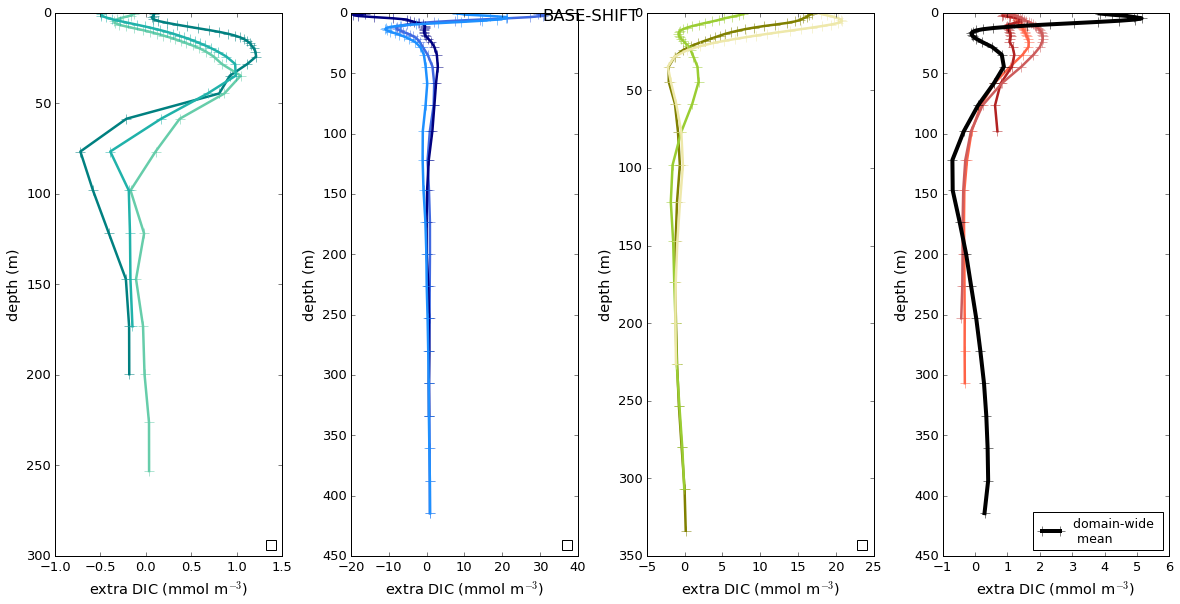

In [11]:
depths = mesh['gdept_1d'][:]
zdepth = depths[0] 

fig = plt.figure(figsize=(16.5*fact, 8.5*fact))

ax3 = plt.subplot2grid((1,4), (0,0), colspan=1, rowspan=1)
ax3.plot(BASE_jdf_dp-SHIFT_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf2_dp-SHIFT_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BASE_jdf3_dp-SHIFT_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax3 = plt.subplot2grid((1,4), (0,1), colspan=1, rowspan=1)
ax3.plot(BASE_cs_dp-SHIFT_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs2_dp-SHIFT_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BASE_cs3_dp-SHIFT_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax3 = plt.subplot2grid((1,4), (0,2), colspan=1, rowspan=1)
ax3.plot(BASE_ns_dp-SHIFT_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns2_dp-SHIFT_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BASE_ns3_dp-SHIFT_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax3 = plt.subplot2grid((1,4), (0,3), colspan=1, rowspan=1)
ax3.plot(BASE_haro_dp-SHIFT_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro2_dp-SHIFT_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BASE_haro3_dp-SHIFT_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BASE_dp-SHIFT_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')
ax3.invert_yaxis()
ax3.legend(loc = 'lower right', fontsize = fs-2)
ax3.set_xlabel('extra DIC (mmol m$^{-3}$)', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)
plt.suptitle('BASE-SHIFT', fontsize = fs+2)
plt.tight_layout()